# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20. You don't need to change any code in the following cell, just run it.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Other imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Classifications"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    #plt.savefig(path, format=fig_extension, dpi=resolution)

## KNN - Predict whether a person will have diabetes or not
### Read data 

In [3]:
# Read data
dataset = pd.read_csv('Lab05_data.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Preprocess the data
The values of some features can't be zeroes. We will replace the zeros with the mean of the feature values.

In [4]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [5]:
#Feature scaling
X = dataset.iloc[:, 0:-1]
y = dataset.iloc[:, -1]

sc_X = StandardScaler()
X = sc_X.fit_transform(X)


### Prepare for the training and test sets

In [6]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### Define the model
Euclidean distance is selected. Select K: $\sqrt{614} \approx 25$. 

In [7]:
classifier = KNeighborsClassifier(n_neighbors=25, metric='euclidean')

In [8]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=25)

### Predictions and Evaluations

In [9]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [10]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[82 17]
 [21 34]]


In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



### Choosing a K Value

Let's use the elbow method to pick a good K Value:

In [12]:
from sklearn.model_selection import cross_val_score

accuracy_rate = []

# The following code will take some time
for i in range(1,35):   
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    score=cross_val_score(knn,X_train,y_train,cv=8)
    accuracy_rate.append(score.mean())

Scikit-Learn’s K-fold **cross-validation** feature is a good way to evaluate a model. The above code randomly splits the training set into 8 distinct subsets called folds, then it trains and evaluates the KNN model 8 times, picking a different fold for evaluation every time and training on the other 7 folds. The result is an array containing the 8 evaluation scores.
### Visualize the fluctuation of the accuracy

Text(0, 0.5, 'Accuracy')

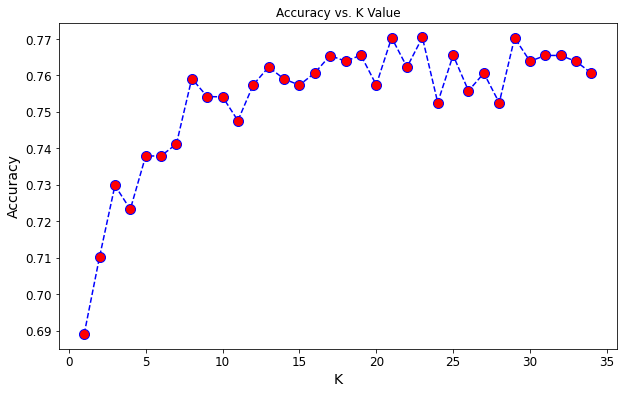

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1,35),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

### Run model with new K value

In [14]:
# NOW WITH K=29
knn = KNeighborsClassifier(n_neighbors=29, metric='euclidean')

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=29')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=29


[[81 18]
 [25 30]]


              precision    recall  f1-score   support

           0       0.76      0.82      0.79        99
           1       0.62      0.55      0.58        55

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.71      0.72      0.72       154



## Naïve Bayes - Text Classification
### Load data from existing dataset 

In [15]:
from sklearn.datasets import fetch_20newsgroups

#Loading data may take a while
data = fetch_20newsgroups()

In [16]:
# Display news categories
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Prepare for the training and test sets

In [17]:
# Split the dataset, train set and test set have already been defined.
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')

In [18]:
# Display sample data
print(train.data[6])

From: bmdelane@quads.uchicago.edu (brian manning delaney)
Subject: Brain Tumor Treatment (thanks)
Reply-To: bmdelane@midway.uchicago.edu
Organization: University of Chicago
Lines: 12

There were a few people who responded to my request for info on
treatment for astrocytomas through email, whom I couldn't thank
directly because of mail-bouncing probs (Sean, Debra, and Sharon).  So
I thought I'd publicly thank everyone.

Thanks! 

(I'm sure glad I accidentally hit "rn" instead of "rm" when I was
trying to delete a file last September. "Hmmm... 'News?' What's
this?"....)

-Brian



### Import libraries to process text messages and train the Naïve Bayes model

In [19]:
# TfidfVectorizer is used to process the text messages and weight the words based on the importance of the words
# more info: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Creating a model based on Multinomial Naïve Bayes
# pipeline is used to control the workflow
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Training the model with train data
model.fit(train.data, train.target)

# Creating labels for the test data
labels = model.predict(test.data)

### Predictions and Evaluations

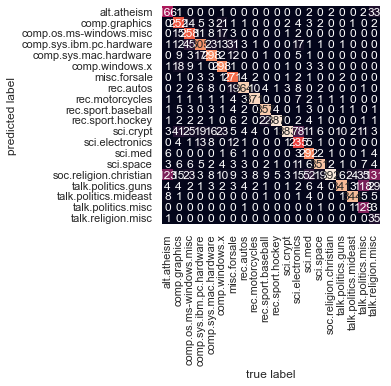

In [20]:
# import seaborn to display confusion matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(test.target, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [21]:
# Print the classification report
# Write your code here
print(classification_report(test.target, labels, target_names=test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69      0.80       390
               rec.autos       0.85      0.92      0.88       396
         rec.motorcycles       0.94      0.93      0.93       398
      rec.sport.baseball       0.92      0.90      0.91       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.59      0.97      0.74       396
         sci.electronics       0.84      0.60      0.70       393
                 sci.med       0.92      0.74      0.82       396
         

In [24]:
# Predict the category for the following text message:
# "Which car is better? Ford or Buick"
# Write your code here
categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
model.predict(['Which car is better? Ford or Buick'])


array([7])

## Run the program and complete the following exercises. (20 points)
1. For the KNN example (Diabetes Diagnosis):
 1. (2 points) When preprocessing the data, why we replace the zero-values with NaN instead of directly replacing them with the mean values? 
 2. (2 points) Why do we need to normalize the variables for KNN algorithms?
 3. (2 points) Why did we choose 25 as the initial number of neighbors(K)?  
 4. (4 points) We used the elbow method to pick a new K value, 29. Compare the results of K=25 and K=29. Based on the accuracy, precision, recall, and F1Score scores, which model performed better? How would you explain the results?
2. For the Naïve Bayes example (Text Classification),  
 1. (2 points) What percentage of data is in the training set? How could you find out? 
 2. (1 points) Print the classification report for this model. (Complete the above cell with a proper command)
 3. (4 points) Based on the classification report, answer the following questions:
     1. What is the accuracy score?
     2. The category name(s) with the highest precision score:
     3. The category name(s) with the highest recall score:
     4. The category name(s) with the highest F1Score score:
 4. (2 points) Using the training model to predict the category for the text message -- "Which car is better? Ford or Buick". Print the **category name** to the screen.
3. (1 points) Create a new Markdown field at the end of this file and put your answers in this field. Submit this file to the Blackboard. 

#### 1.1. (2 points) When preprocessing the data, why we replace the zero-values with NaN instead of directly replacing them with the mean values? 

we replace the zero-values with NaN instead of directly replacing them with the mean values because we want to keep the original data and we can use the original data to calculate the mean values.

#### 1.2. (2 points) Why do we need to normalize the variables for KNN algorithms?

 we need to normalize the variables for KNN algorithms because the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

#### 1.3. (2 points) Why did we choose 25 as the initial number of neighbors(K)?

we choose 25 as the initial number of neighbors(K) because the square root of the number of observations is a good starting point for K.

#### 1.4. (4 points) We used the elbow method to pick a new K value, 29. Compare the results of K=25 and K=29. Based on the accuracy, precision, recall, and F1Score scores, which model performed better? How would you explain the results?

 The model with K=25 performed better than the model with K=29. The accuracy, precision, recall, and F1Score scores of the model with K=25 are higher than the model with K=29. The model with K=25 is more accurate than the model with K=29 especially for the true outcome 

### 2. For the Naïve Bayes example (Text Classification),  

#### 2.1. (2 points) What percentage of data is in the training set? How could you find out? 

The percentage of data in the training set is 100%. We can find out by using the following command: 

```python
print("Training set has {} instances ({}%)".format(len(train.data), 100*len(train.data)/len(data.data)))
```


In [53]:
print("Training set has {} instances ({}%)".format(len(train.data), 100*len(train.data)/len(data.data)))

Training set has 11314 instances (100.0%)


#### 3. (4 points) Based on the classification report, answer the following questions:
#### 1. What is the accuracy score?
 2. The category name(s) with the highest precision score: <p>talk.religion.misc</p>
 3. The category name(s) with the highest recall score:<p>soc.religion.christian</p>
 4. The category name(s) with the highest F1Score score:<p>rec.sport.hockey, rec.motorcycles</p>

There are a few reasons for this. One is that you might want to keep the original data intact in case you need to go back and reference it later. Another reason is that mean values can be affected by outliers, so replacing with the mean might not give you an accurate representation of the data.

KNN algorithms require that all variables be normalized in order to function properly. This is because the algorithm relies on calculating distances between points, and if the variables are not normalized, then some variables will have a much larger effect on the distance calculation than others.

K is usually determined using the square root of N, where N is the total number of samples. In our problem, there are 614 samples in the train data, so we choose 25 as the K value.